In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [73]:
df = pd.DataFrame(np.arange(5*4).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


## Data Sampling

In [74]:
#random subset without replacement
df_sample_without_replacement = df.take(np.random.permutation(len(df)))[:3]
df_sample_without_replacement

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3


In [75]:
np.random.permutation(df)[:3]

array([[16, 17, 18, 19],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [76]:
#samle with replacement
sampler = np.random.randint(0, len(df), size=3)
sampler

array([3, 3, 2])

In [77]:
df_sampled_with_replacement = df.take(sampler)
df_sampled_with_replacement

,0,1,2,3
3,12,13,14,15
3,12,13,14,15
2,8,9,10,11


## Data Normalization and Standardization

In [78]:
df_norm = df/df.sum().astype('float')
df_norm

,0,1,2,3
0,0.0,0.022222,0.04,0.054545
1,0.1,0.111111,0.12,0.127273
2,0.2,0.200000,0.20,0.200000
3,0.3,0.288889,0.28,0.272727
4,0.4,0.377778,0.36,0.345455


In [79]:
perm = np.random.permutation(len(df))
print perm
df_permuted = df.take(perm)
print df_permuted

[0 2 1 4 3]
    0   1   2   3
0   0   1   2   3
2   8   9  10  11
1   4   5   6   7
4  16  17  18  19
3  12  13  14  15


In [80]:
df_permuted_norm = df_permuted / df_permuted.sum().astype(float)
df_permuted_norm

,0,1,2,3
0,0.0,0.022222,0.04,0.054545
2,0.2,0.200000,0.20,0.200000
1,0.1,0.111111,0.12,0.127273
4,0.4,0.377778,0.36,0.345455
3,0.3,0.288889,0.28,0.272727


## The Iris Dataset!!!

In [81]:
file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(file_url, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
iris_data = data.dropna()

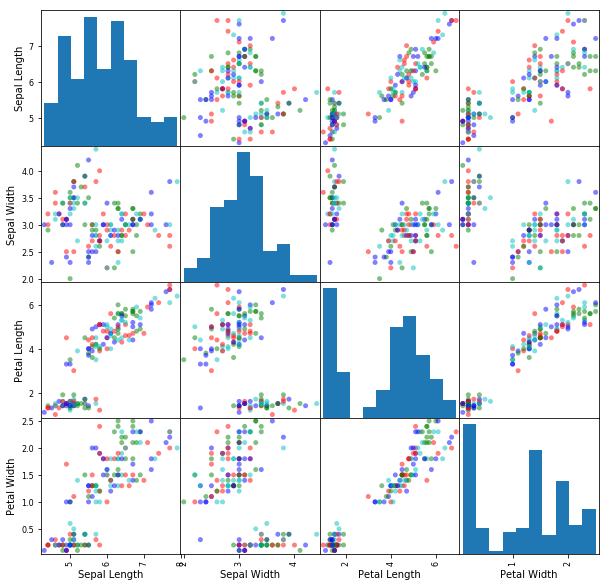

In [83]:
my_colors = ['g','b','r','c']
pl1 = pd.plotting.scatter_matrix(iris_data, diagonal='hist',figsize=(10,10),color=my_colors,s=100)

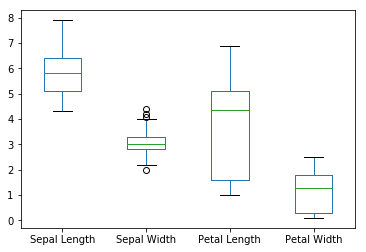

In [84]:
p12 = iris_data.boxplot(grid=False)

In [85]:
iris_data['Sepal Width'] = np.where((iris_data['Sepal Width'] > 4) | (iris_data['Sepal Width'] < 2.1), np.nan, iris_data['Sepal Width'])
iris_data['Sepal Width'] = iris_data['Sepal Width'].interpolate()

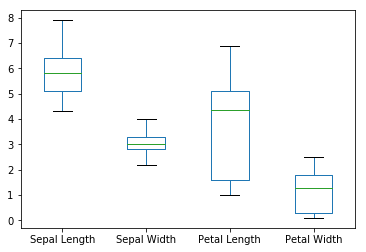

In [86]:
p13 = iris_data.boxplot(grid=False)

In [87]:
#sample the data with replacement
sampler = np.random.randint(0, len(iris_data),size=100)
iris_data = iris_data.take(sampler)
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
36,5.5,3.5,1.3,0.2,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa


In [88]:
#z-score normalization
iris_data = iris_data.groupby('Name').transform(lambda x: (x-x.mean())/x.std(ddof=1))
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
36,1.606439,0.352434,-1.153036,-0.512966
83,0.062588,-0.365201,1.892865,1.577070
6,-1.285151,-0.041814,-0.529263,0.427471
138,-0.865664,0.482645,-1.091398,-0.741345
16,1.285151,1.929424,-1.153036,1.367909


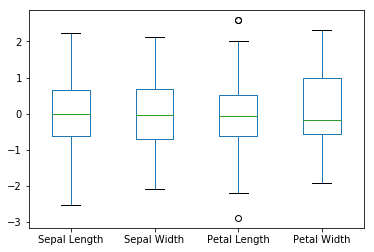

In [91]:
pl14 = iris_data.boxplot(grid=False)

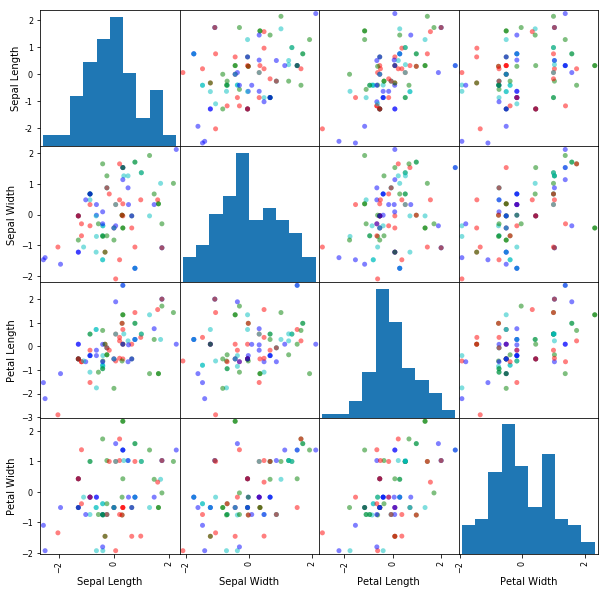

In [92]:
plt15 = pd.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color = my_colors, s=100)